In [1]:
# Install dependencies
!pip install pyyaml==5.1 torch torchvision opencv-python
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install git+https://github.com/facebookresearch/detectron2.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 3.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package 

In [9]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger

# Enable detectron2 logging
setup_logger()

# Core components
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

# Dataset utilities
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [10]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances(
    "crack_train", {},
    "/content/drive/MyDrive/dataset/train/_annotations.coco.json",
    "/content/drive/MyDrive/dataset/train"
)

register_coco_instances(
    "crack_val", {},
    "/content/drive/MyDrive/dataset/valid/_annotations.coco.json",
    "/content/drive/MyDrive/dataset/valid"
)


In [11]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

cfg = get_cfg()

# Load default config from model zoo (Mask R-CNN with FPN)
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))

# Register datasets
cfg.DATASETS.TRAIN = ("crack_train",)
cfg.DATASETS.TEST = ("crack_val",)

# Dataloader workers (keep low for CPU)
cfg.DATALOADER.NUM_WORKERS = 2

# Pretrained COCO weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

# Training hyperparameters
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 10  # Increase this for better training
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Set to your number of classes

# IMPORTANT: Use CPU
cfg.MODEL.DEVICE = "cpu"

# Output folder
cfg.OUTPUT_DIR = "/content/detectron2_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [12]:
from detectron2.engine import DefaultTrainer  # Ensure this is from Detectron2

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()



[07/19 11:37:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[07/19 11:37:35 d2.engine.train_loop]: Starting training from iteration 0
[07/19 11:42:42 d2.utils.events]:  eta: 0:00:00  iter: 9  total_loss: 0.476  loss_cls: 0.4121  loss_box_reg: 0  loss_mask: 0  loss_rpn_cls: 0.02356  loss_rpn_loc: 0.0243    time: 28.0540  last_time: 31.4954  data_time: 0.0482  last_data_time: 0.0093   lr: 0.00022503  
[07/19 11:42:42 d2.engine.hooks]: Overall training speed: 8 iterations in 0:03:44 (28.0541 s / it)
[07/19 11:42:42 d2.engine.hooks]: Total training time: 0:03:46 (0:00:01 on hooks)
WARNING [07/19 11:42:42 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/19 11:42:42 d2.data.datasets.coco]: Loaded 416 images in COCO format from /content/drive/MyDrive/dataset/valid/_annotations.coco.json
[07/19 11:42:42 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/19 11:42:42 d2.da

In [32]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load saved config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 🛑 Replace with actual number!
cfg.MODEL.WEIGHTS = "/content/detectron2_output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.MODEL.DEVICE = "cpu"

predictor = DefaultPredictor(cfg)


[07/19 12:01:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/detectron2_output/model_final.pth ...


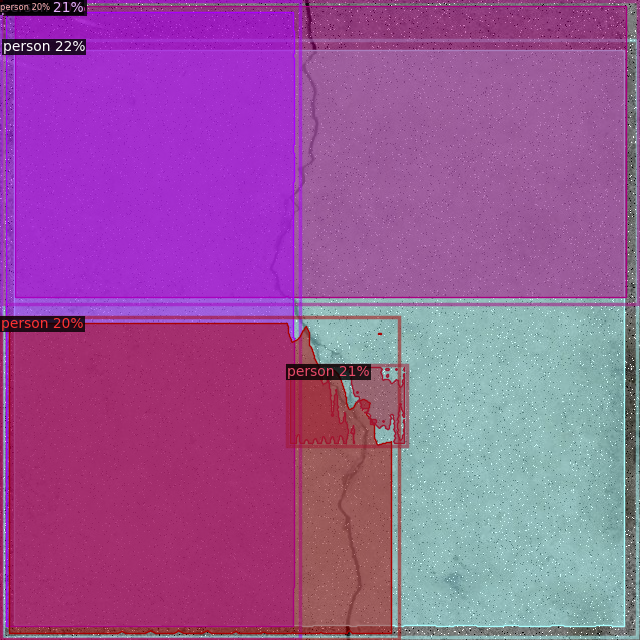

In [33]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/_007_png_jpg.rf.19cf714a6fe31bc8930b7f183a0cae7d.jpg")  # Replace with your image path
outputs = predictor(image)

# Visualize
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

v = Visualizer(image[:, :, ::-1], metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])


In [36]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog

# Load saved config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.WEIGHTS = "/content/detectron2_output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1
cfg.MODEL.DEVICE = "cpu"

# ✅ Set correct class name to override COCO's "person"
#MetadataCatalog.get("crack_train").thing_classes = ["crack"]
metadata = MetadataCatalog.get("crack_train")  # ✅ Get registered metadata
predictor = DefaultPredictor(cfg)


[07/19 12:02:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/detectron2_output/model_final.pth ...


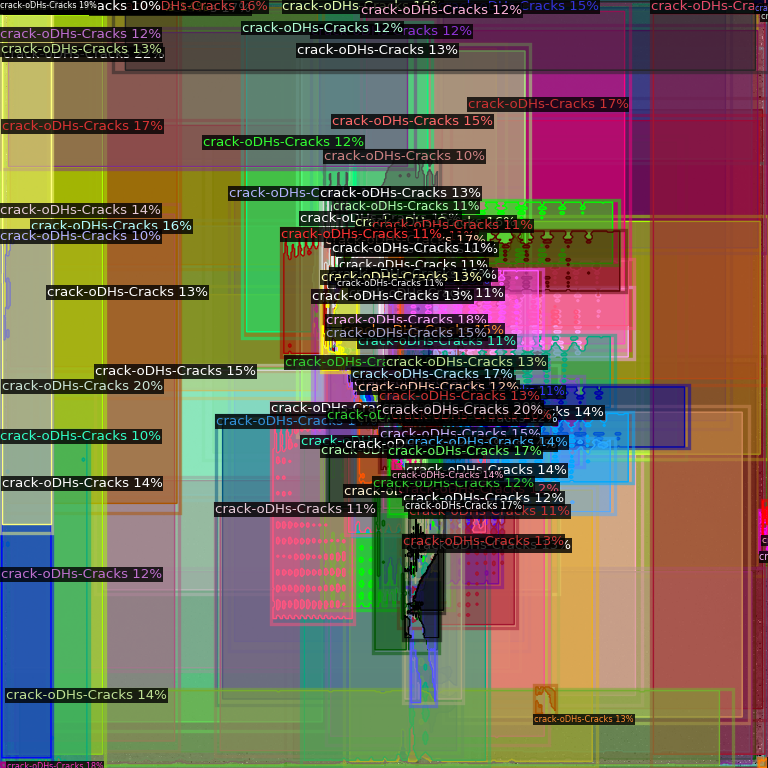

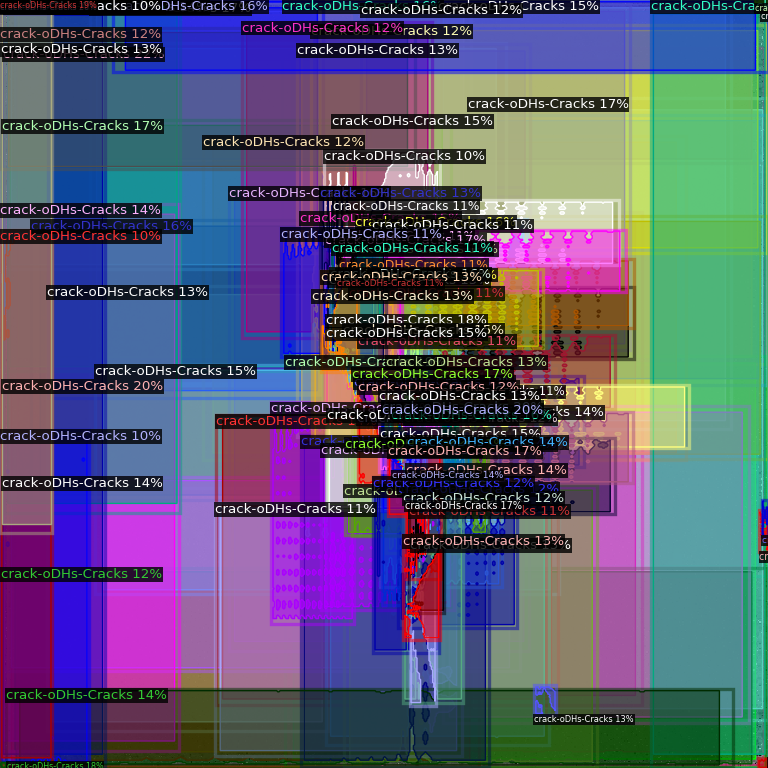

In [37]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode

from google.colab.patches import cv2_imshow

cv2_imshow(out.get_image()[:, :, ::-1])

v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.0, instance_mode=ColorMode.IMAGE)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

import cv2

im = cv2.imread("/content/_007_png_jpg.rf.19cf714a6fe31bc8930b7f183a0cae7d.jpg")

outputs = predictor(im)

# Use correct metadata
v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get("crack_train"), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(out.get_image()[:, :, ::-1])
